In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Import the data set

In [32]:
lab_data = pd.read_csv('../data/83_Loeschcke_et_al_2000_Thorax_&_wing_traits_lab pops.csv')

In [33]:
lab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1731 entries, 0 to 1730
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Species        1731 non-null   object 
 1   Population     1731 non-null   object 
 2   Latitude       1731 non-null   float64
 3   Longitude      1731 non-null   float64
 4   Year_start     1731 non-null   int64  
 5   Year_end       1731 non-null   int64  
 6   Temperature    1731 non-null   int64  
 7   Vial           1731 non-null   int64  
 8   Replicate      1731 non-null   int64  
 9   Sex            1731 non-null   object 
 10  Thorax_length  1731 non-null   object 
 11  l2             1731 non-null   float64
 12  l3p            1731 non-null   float64
 13  l3d            1731 non-null   float64
 14  lpd            1731 non-null   float64
 15  l3             1731 non-null   float64
 16  w1             1731 non-null   float64
 17  w2             1731 non-null   float64
 18  w3      

In [34]:
lab_data.head()

,Species,Population,Latitude,Longitude,Year_start,Year_end,Temperature,Vial,Replicate,Sex,Thorax_length,l2,l3p,l3d,lpd,l3,w1,w2,w3,wing_loading
0,D._aldrichi,Binjour,-25.52,151.45,1994,1994,20,1,1,female,1.238,2.017,0.659,1.711,2.370,2.370,1.032,1.441,1.192,1.914
1,D._aldrichi,Binjour,-25.52,151.45,1994,1994,20,1,1,male,1.113,1.811,0.609,1.539,2.148,2.146,0.938,1.299,1.066,1.928
2,D._aldrichi,Binjour,-25.52,151.45,1994,1994,20,1,2,female,1.215,1.985,0.648,1.671,2.319,2.319,0.991,1.396,1.142,1.908
3,D._aldrichi,Binjour,-25.52,151.45,1994,1994,20,1,2,male,1.123,1.713,0.596,1.495,2.091,2.088,0.958,1.286,1.062,1.860
4,D._aldrichi,Binjour,-25.52,151.45,1994,1994,20,2,1,female,1.218,1.938,0.641,1.658,2.298,2.298,1.010,1.418,1.148,1.886


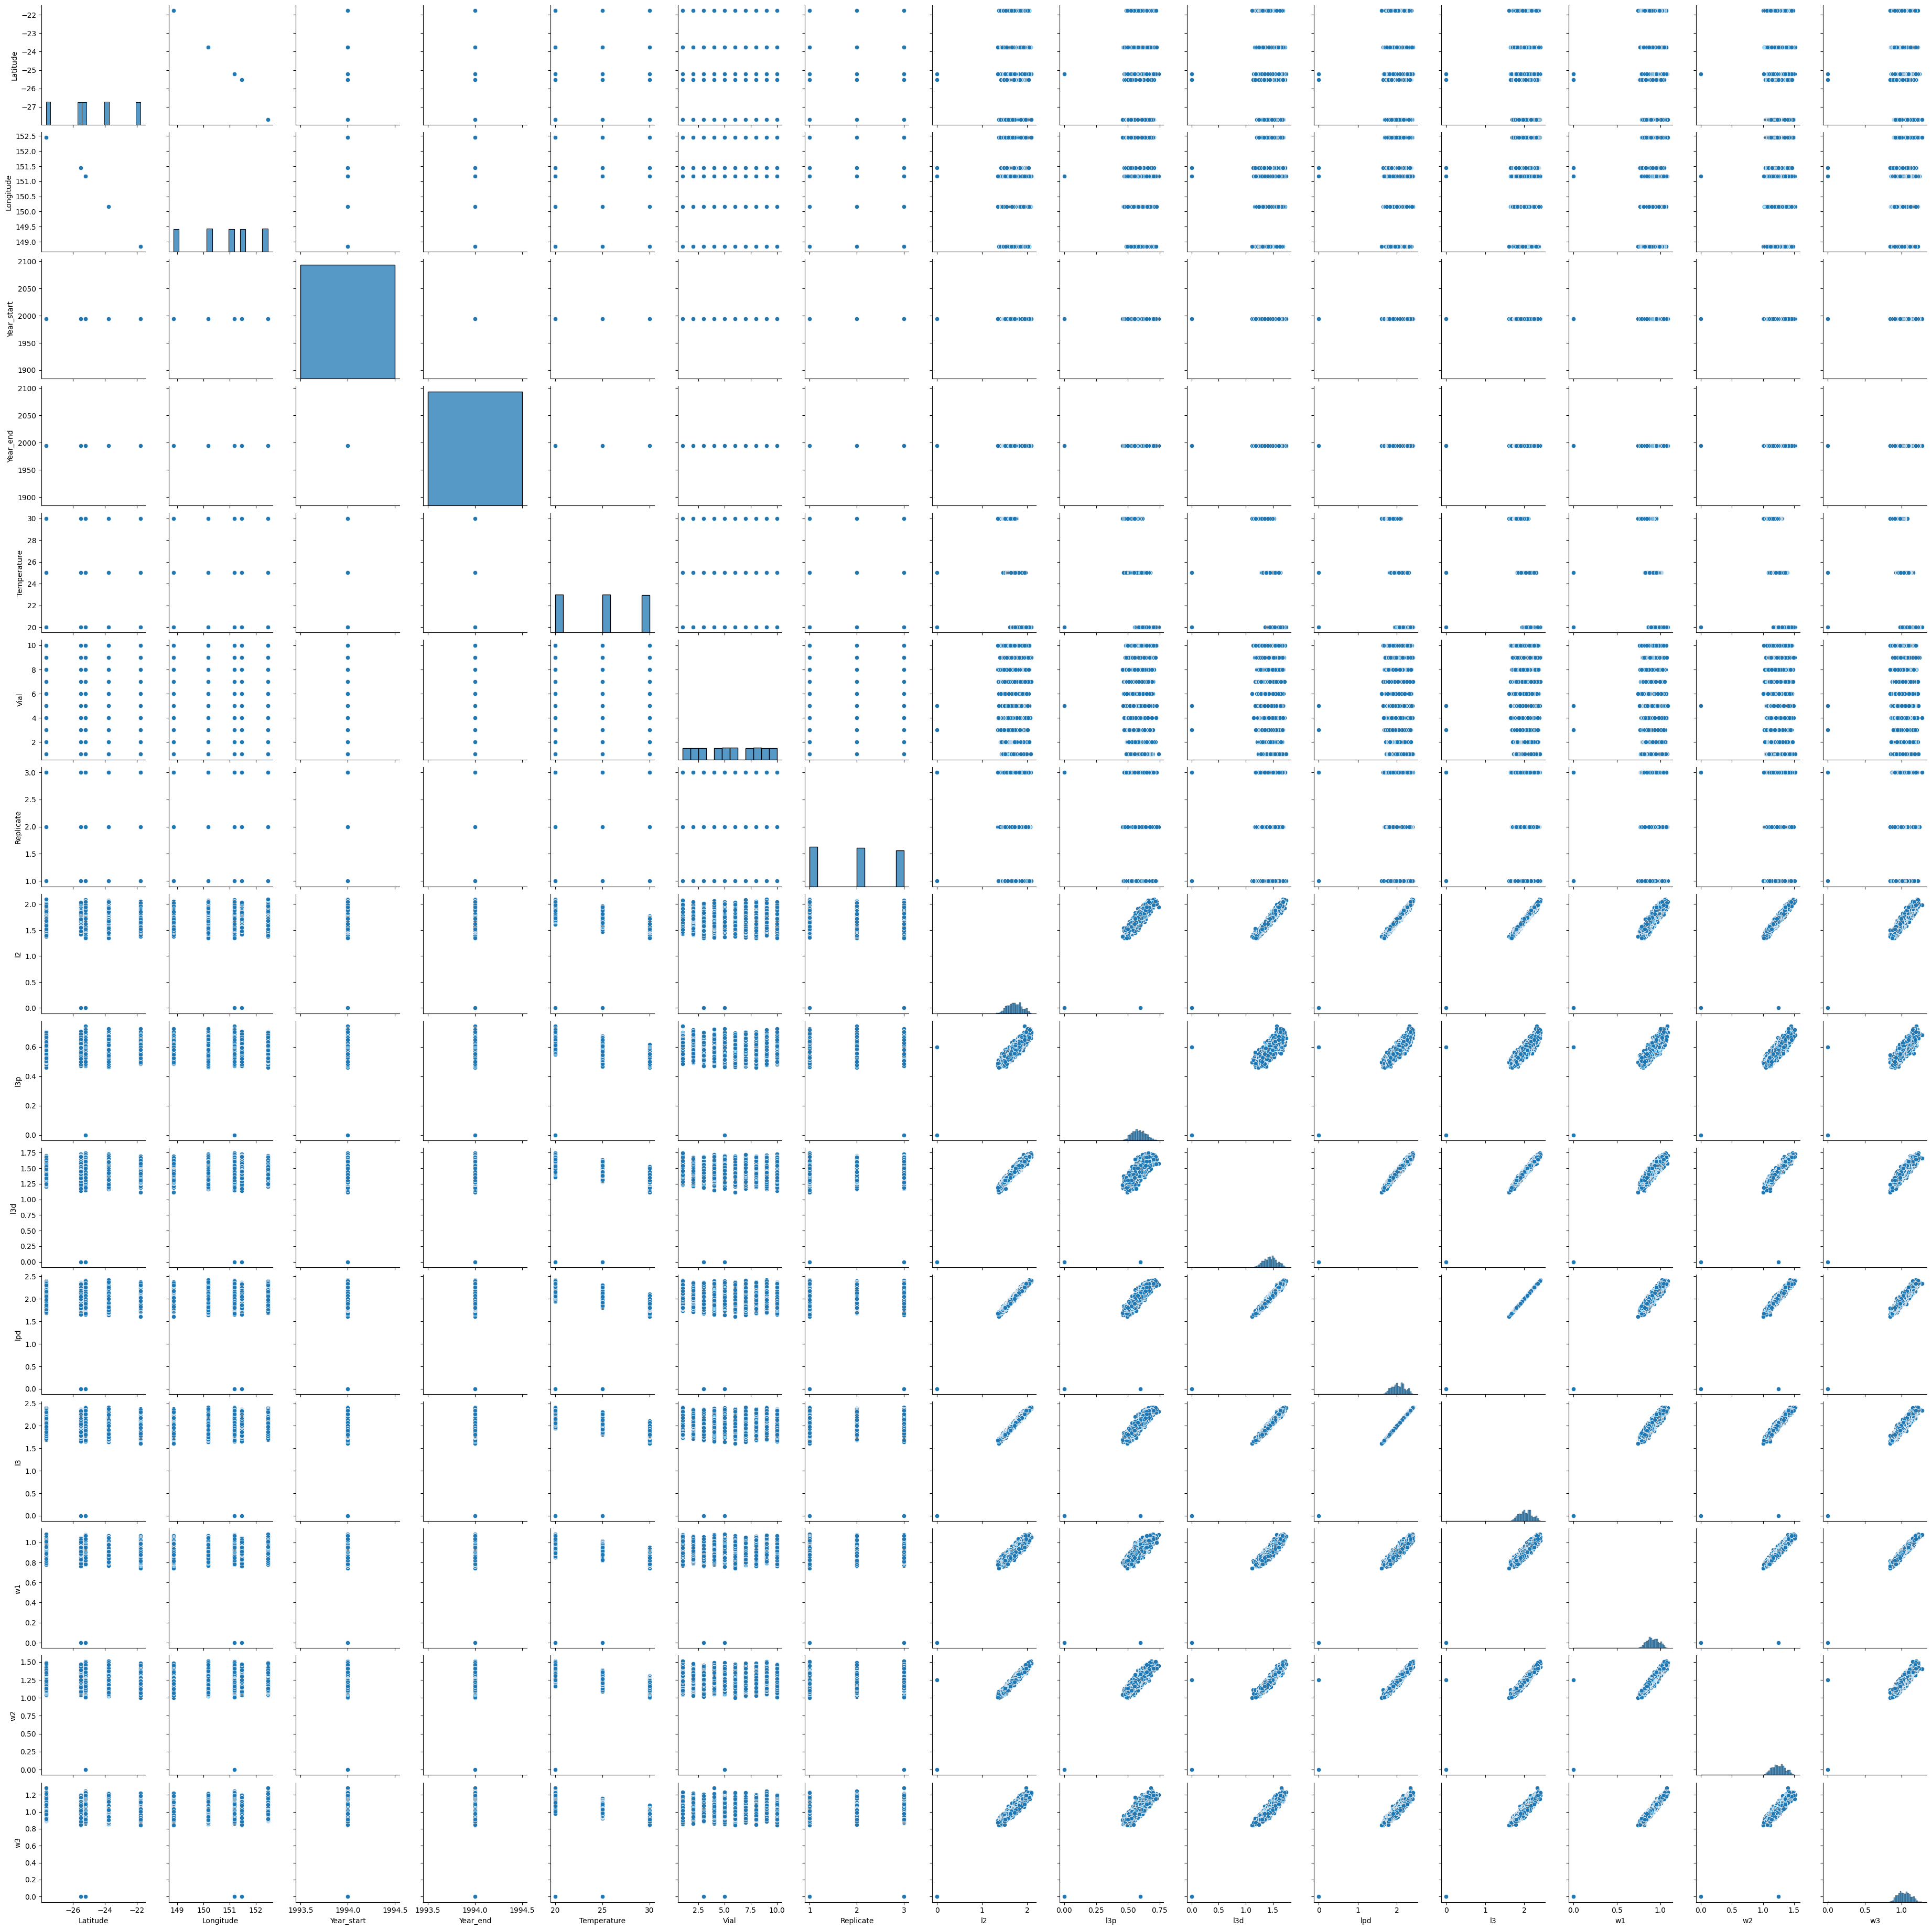

In [35]:
sns.pairplot(lab_data)

In [36]:
#TODO: Currently using decision tree so no need to normalise, but must do for other methods

In [37]:
lab_data = shuffle(lab_data)
lab_data['class'] = lab_data.apply(
    lambda x: f'{x['Species']}, {x['Population']}, {x['Sex']}',
    axis=1
)
lab_data.head()

,Species,Population,Latitude,Longitude,Year_start,Year_end,Temperature,Vial,Replicate,Sex,...,l2,l3p,l3d,lpd,l3,w1,w2,w3,wing_loading,class
164,D._aldrichi,Gogango_Creek,-23.77,150.17,1994,1994,20,1,2,female,...,1.829,0.622,1.549,2.170,2.170,0.997,1.360,1.117,1.848,"D._aldrichi, Gogango_Creek, female"
861,D._buzzatii,Binjour,-25.52,151.45,1994,1994,20,4,3,female,...,1.969,0.687,1.617,2.304,2.304,1.002,1.394,1.162,1.861,"D._buzzatii, Binjour, female"
57,D._aldrichi,Binjour,-25.52,151.45,1994,1994,25,2,1,male,...,1.740,0.563,1.502,2.065,2.063,0.863,1.229,0.994,1.874,"D._aldrichi, Binjour, male"
957,D._buzzatii,Binjour,-25.52,151.45,1994,1994,25,10,3,female,...,1.841,0.625,1.534,2.159,2.158,0.958,1.324,1.095,1.863,"D._buzzatii, Binjour, female"
1104,D._buzzatii,Gogango_Creek,-23.77,150.17,1994,1994,25,5,1,male,...,1.674,0.582,1.410,1.992,1.991,0.883,1.198,1.014,1.870,"D._buzzatii, Gogango_Creek, male"


In [38]:

train, test = train_test_split(lab_data, test_size=0.3)

In [39]:
classifier = DecisionTreeClassifier(criterion='entropy', max_depth=5)

classifier.fit(
    train[['l2', 'l3p', 'l2', 'l3p', 'l2', 'l3p', 'l2', 'l3p', 'l2', 'l3p']],
    train[['class']]
)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [40]:
train['class_predictions'] = classifier.predict(train[['l2', 'l3p', 'l2', 'l3p', 'l2', 'l3p', 'l2', 'l3p', 'l2', 'l3p']])

In [42]:
train.head()

,Species,Population,Latitude,Longitude,Year_start,Year_end,Temperature,Vial,Replicate,Sex,...,l3p,l3d,lpd,l3,w1,w2,w3,wing_loading,class,class_predictions
1054,D._buzzatii,Gogango_Creek,-23.77,150.17,1994,1994,20,6,3,male,...,0.632,1.536,2.169,2.168,0.949,1.289,1.123,1.837,"D._buzzatii, Gogango_Creek, male","D._aldrichi, Binjour, female"
1028,D._buzzatii,Gogango_Creek,-23.77,150.17,1994,1994,20,2,2,male,...,0.630,1.543,2.172,2.172,0.948,1.320,1.097,1.907,"D._buzzatii, Gogango_Creek, male","D._buzzatii, Grandchester, male"
12,D._aldrichi,Binjour,-25.52,151.45,1994,1994,20,3,3,female,...,0.651,1.680,2.330,2.328,1.025,1.438,1.154,1.879,"D._aldrichi, Binjour, female","D._buzzatii, Grandchester, female"
341,D._aldrichi,Grandchester,-27.68,152.45,1994,1994,20,1,2,female,...,0.636,1.648,2.284,2.283,1.038,1.402,1.173,1.915,"D._aldrichi, Grandchester, female","D._buzzatii, Gogango_Creek, female"
212,D._aldrichi,Gogango_Creek,-23.77,150.17,1994,1994,20,9,2,male,...,0.568,1.466,2.034,2.033,0.952,1.257,1.082,1.871,"D._aldrichi, Gogango_Creek, male","D._buzzatii, Grandchester, male"


In [46]:
#Correct predictions
train.apply(
    lambda x: 1 if x['class_predictions'] == x['class'] else 0,
    axis=1
).sum()

198

In [47]:
#Incorrect predictions
train.apply(
    lambda x: 1 if x['class_predictions'] != x['class'] else 0,
    axis=1
).sum()

1013

In [49]:
# Retry with a deeper depth

In [50]:
deep_classifier = DecisionTreeClassifier(criterion='entropy', max_depth=10)

deep_classifier.fit(
    train[['l2', 'l3p', 'l2', 'l3p', 'l2', 'l3p', 'l2', 'l3p', 'l2', 'l3p']],
    train[['class']]
)

DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [57]:
train['deep_class_predictions'] = deep_classifier.predict(train[['l2', 'l3p', 'l2', 'l3p', 'l2', 'l3p', 'l2', 'l3p', 'l2', 'l3p']])

In [58]:
#Correct deep predictions
train.apply(
    lambda x: 1 if x['deep_class_predictions'] == x['class'] else 0,
    axis=1
).sum()

588

In [65]:
min_leaf_classifier = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=3)

min_leaf_classifier.fit(
    train[['l2', 'l3p', 'l2', 'l3p', 'l2', 'l3p', 'l2', 'l3p', 'l2', 'l3p']],
    train[['class']]
)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=3)

In [66]:
train['min_leaf_predictions'] = min_leaf_classifier.predict(train[['l2', 'l3p', 'l2', 'l3p', 'l2', 'l3p', 'l2', 'l3p', 'l2', 'l3p']])

In [67]:
#Correct min_leaf predictions
train.apply(
    lambda x: 1 if x['min_leaf_predictions'] == x['class'] else 0,
    axis=1
).sum()

571

In [68]:
fully_fit_classifier = DecisionTreeClassifier(criterion='entropy')

fully_fit_classifier.fit(
    train[['l2', 'l3p', 'l2', 'l3p', 'l2', 'l3p', 'l2', 'l3p', 'l2', 'l3p']],
    train[['class']]
)

DecisionTreeClassifier(criterion='entropy')

In [71]:
train['fully_fit_predictions'] = fully_fit_classifier.predict(train[['l2', 'l3p', 'l2', 'l3p', 'l2', 'l3p', 'l2', 'l3p', 'l2', 'l3p']])

In [72]:
#Correct fully_fit predictions
train.apply(
    lambda x: 1 if x['fully_fit_predictions'] == x['class'] else 0,
    axis=1
).sum()

1188

In [ ]:
# Checking the min leaf and fully fit classifiers against the test set

In [73]:
#Correst min_leaf predictions on the test set

In [81]:
test['min_leaf_predictions'] = min_leaf_classifier.predict(test[['l2', 'l3p', 'l2', 'l3p', 'l2', 'l3p', 'l2', 'l3p', 'l2', 'l3p']])
test['fully_fit_predictions'] = fully_fit_classifier.predict(test[['l2', 'l3p', 'l2', 'l3p', 'l2', 'l3p', 'l2', 'l3p', 'l2', 'l3p']])


correct_min_leaf_classification_test = test.apply(
    lambda x: 1 if x['min_leaf_predictions'] == x['class'] else 0,
    axis=1
).sum()

print("Min leaf correct predictions test set:" + str(correct_min_leaf_classification_test))

correct_fully_fit_classification_test = test.apply(
    lambda x: 1 if x['fully_fit_predictions'] == x['class'] else 0,
    axis=1
).sum()

print("Fully fit predictions test set:" + str(correct_fully_fit_classification_test))


Min leaf correct predictions test set:41
Fully fit predictions test set:46
